<a href="https://colab.research.google.com/github/EddyGiusepe/Cyber_Security_1/blob/main/CyberSecurity_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Cyber Security -- Kaggle</h2> 


**Data Scientist Jr.:**  Dr.Eddy Giusepe Chirinos Isidro


Neste Script reproduziremos e exploraremos ataques cibernéticos. Basicamente temos Dados onde no último mês, alguns eventos de SEGURANÇA CIBERNÉTICA com durações e padrões diferentes foram registrados.


Nesse sentido, podemos derivar:

* Endereço de IP de destino mais direcionado,
* A maioria das portas lógicas atacadas,
* Tipo de ataque mais frequente/comum,
* Hora diferente do dia (odd (estranho), horas, dia ou noite),
* Encontrar um padrão.

Este Script está baseado nos seguintes links:

* [Cyber Security](https://www.kaggle.com/iamranjann/exploring-attacks-cybersec/notebook).
* [Cyber Security no YouTube](https://www.youtube.com/watch?v=7q8XQSUeUPc&list=PLlUZLZydkS79ctBEkAqeNj5k0RNvAvvD7&index=1).

## Importamos as nossas bibliotecas

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

## Carregamos nossos Dados de Cyber Security

In [76]:
df = pd.read_csv("/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/3_Data_Science_Augusto_Eddy/Attacks CyberSecurity Kaggle/Cybersecurity_attacks.csv")


In [77]:
df.shape

(178031, 11)

In [78]:
# Observamos que as nossas colunas são:

df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [79]:
df.head(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


## Análise, limpeza e exploração de nossos Dados

In [80]:
# Na coluna "time" aplicamos o método --> split(), para separar em tempo de início e tempo final

df[['Start time', 'Last time']] = df['Time'].str.split('-', expand=True)

df.sample(6)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
139194,Generic,IXIA,udp,175.45.176.1,47439,149.171.126.14,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.,1424252041-1424252041,1424252041,1424252041
47928,Exploits,Miscellaneous,ipv6,175.45.176.3,0,149.171.126.19,0,Nginx HTTP request Buffer Underflow and Denial...,CVE 2009-2629 (http://cve.mitre.org/cgi-bin/cv...,.,1424230235-1424230235,1424230235,1424230235
174362,Fuzzers,RIP,udp,175.45.176.1,51735,149.171.126.13,-568,Fuzzer: RIP Version Field (https://strikecente...,-,.,1421928719-1421928719,1421928719,1421928719
57056,DoS,Miscellaneous,unas,175.45.176.3,0,149.171.126.19,0,Microsoft Windows IP Options Off-By-One (https...,CVE 2005-0048 (http://cve.mitre.org/cgi-bin/cv...,.,1424230398-1424230398,1424230398,1424230398
21335,DoS,HTTP,rsvp,175.45.176.0,0,149.171.126.13,0,PHP5 php_register_variable_ex Buffer Overflow ...,CVE 2012-0830 (http://cve.mitre.org/cgi-bin/cv...,.,1424223193-1424223193,1424223193,1424223193
137722,Exploits,Miscellaneous,unas,175.45.176.0,0,149.171.126.17,0,Airlive IP Camera Directory Traversal (https:/...,CVE 2013-3541 (http://cve.mitre.org/cgi-bin/cv...,.,1424251720-1424251720,1424251720,1424251720


In [81]:
# Percebemos que temos uma coluna com nome --> "."
# Vejamos nesta coluna se temos algum valor (numérico o categórico), assim:

df['.'].unique()


array(['.'], dtype=object)

In [82]:
# Seguidamente eliminamos colunas que não são uteis para nossa análise
# Dropamos colunas e fazemos uma cópia na memória do objeto

df = df.drop(['.', 'Time'], axis=1) 

df.sample(6)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
118021,Exploits,Miscellaneous,ospf,175.45.176.2,0,149.171.126.17,0,Airlive IP Camera Cross Site Request Forgery (...,CVE 2013-3540 (http://cve.mitre.org/cgi-bin/cv...,1424247161,1424247220
8862,Exploits,Clientside,tcp,175.45.176.3,53518,149.171.126.16,110,Adobe Acrobat and Reader Font Parsing Integer ...,CVE 2010-2862 (http://cve.mitre.org/cgi-bin/cv...,1421931527,1421931531
8674,Fuzzers,BGP,Tcp,175.45.176.0,13755,149.171.126.10,179,BGP Open: Params: Invalid Field Length (https:...,-,1421931441,1421931442
88998,Exploits,RTSP,ospf,175.45.176.1,0,149.171.126.17,0,Ubiquiti AirCam RTSP Service Buffer Overflow (...,CVE 2013-1606 (http://cve.mitre.org/cgi-bin/cv...,1424238233,1424238258
88177,Exploits,Clientside,tcp,175.45.176.3,18001,149.171.126.17,25,Microsoft Office Excel Sheet Object Type Confu...,CVE 2010-0258 (http://cve.mitre.org/cgi-bin/cv...,1424237946,1424237949
97755,Exploits,Miscellaneous,ospf,175.45.176.0,0,149.171.126.12,0,Mozilla Firefox Integer Overflow (https://stri...,CVE 2010-1214 (http://cve.mitre.org/cgi-bin/cv...,1424242143,1424242200


In [83]:
df.shape

(178031, 11)

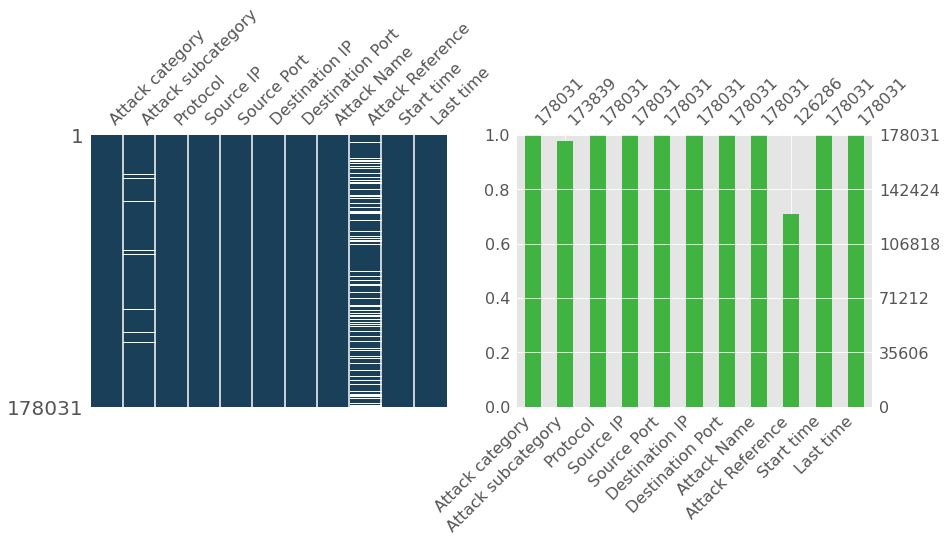

In [84]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [85]:
# Vejamos os valores MISSING que temos em nossos Dados

df.isna().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [86]:
# Também

df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [87]:
# Aqui vamos a preecher os valores MISSING com "Not Registered"

df["Attack subcategory"] = df["Attack subcategory"].fillna("Not Registered")

In [88]:
# Visualizamos nossos Dados e verificamos a troca de NaN --> "Not Registered"

df.sample(100)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
44619,Exploits,Office Document,tcp,175.45.176.1,35109,149.171.126.13,25,Microsoft Excel Qsir Record Memory Corruption ...,CVE 2009-1134 (http://cve.mitre.org/cgi-bin/cv...,1424229679,1424229680
80547,Reconnaissance,ICMP,aris,175.45.176.1,0,149.171.126.10,0,IP Options: Extended Security (IP Option 5) (h...,NaN,1424237342,1424237342
74390,Exploits,RTSP,st2,175.45.176.1,0,149.171.126.10,0,Zavio IP Camera RTSP Authentication Bypass (ht...,CVE 2013-2569 (http://cve.mitre.org/cgi-bin/cv...,1424237236,1424237237
143952,Analysis,HTML,tcp,175.45.176.3,5855,149.171.126.19,80,Analysis: Killed ActiveX Instantiation (https:...,NaN,1424254093,1424254094
83536,Reconnaissance,HTTP,tcp,175.45.176.0,58193,149.171.126.12,80,Oracle 9i HTTP Server Dynamic Monitoring Servi...,CVE 2002-0563 (http://cve.mitre.org/cgi-bin/cv...,1424237377,1424237379
...,...,...,...,...,...,...,...,...,...,...,...
69700,Generic,SIP,UDP,175.45.176.0,58609,149.171.126.16,5060,RFC 4475: SIP Torture Tests: Negative Content-...,http://www.ietf.org/rfc/rfc4475.txt (http%3a%2...,1424234674,1424234674
127320,Exploits,Miscellaneous,mux,175.45.176.0,0,149.171.126.17,0,Rhino Serv-U File Server Buffer Overflow (http...,CVE 2009-4006 (http://cve.mitre.org/cgi-bin/cv...,1424251580,1424251581
135321,Exploits,ICMP,unas,175.45.176.0,0,149.171.126.17,0,Linux Kernel ICMP_Send Remote Denial Of Servic...,CVE 2006-0454 (http://cve.mitre.org/cgi-bin/cv...,1424251667,1424251667
7027,Reconnaissance,SunRPC Portmapper (TCP) UDP Service,Tcp,175.45.176.2,28562,149.171.126.15,111,SunRPC TCP Portmapper GETPORT Request (diskinf...,-,1421930805,1421930806


In [89]:
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [90]:
df.shape

(178031, 11)

In [91]:
df[pd.isnull(df).any(axis=1)].shape

(51745, 11)

In [92]:
# Vejamos quantas linhas duplicadas temos
# A seguir eliminaremos essas linhas duplicadas

df[df.duplicated()].shape # Temos 6 linhas duplicadas

(6, 11)

In [93]:
print('Dimensões antes de descartar linhas duplicadas: ' + str(df.shape))
df = df.drop(df[df.duplicated()].index)
print('Dimensões após eliminar linhas duplicadas: ' + str(df.shape))

Dimensões antes de descartar linhas duplicadas: (178031, 11)
Dimensões após eliminar linhas duplicadas: (178025, 11)


In [94]:
# Aqui podemos verificar qua não temos linhas duplicadas

df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [95]:
invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)
df[invalid_SP | invalid_DP]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,NaN,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,NaN,1424223172,1424223172
...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424224338,1424224338
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,1424219921,1424219923
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,1424247789,1424247789


In [96]:
df = df[~(invalid_SP | invalid_DP)].reset_index(drop=True)

In [97]:
df.shape

(174341, 11)

In [98]:
# Aqui analisamos dois colunas: "Protocol"  and  "Attack category": 

print('Número total de protocolos diferentes:', len(df['Protocol'].unique()))
print('Número total de diferentes Attack category:', len(df['Attack category'].unique()))


Número total de protocolos diferentes: 131
Número total de diferentes Attack category: 14


In [99]:
# Aqui visualizamos os elementos diferentes na coluna: "Protocolo" 

df['Protocol'].unique()

array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

In [100]:
# Aqui visualizamos as diferentes propriedades da coluna: "Attack category":

df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

In [101]:
df.sample(50)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
94407,Fuzzers,SMB,tcp,175.45.176.2,48584,149.171.126.10,445,Fuzzer: SMB Negotiate Invalid Dialect (https:/...,NaN,1424240401,1424240401
431,Fuzzers,BGP,tcp,175.45.176.3,56194,149.171.126.14,179,BGP Open: Bad Payload Strings (https://strikec...,-,1421927704,1421927705
56503,Reconnaissance,ICMP,unas,175.45.176.3,0,149.171.126.19,0,ICMP Echo Request (https://strikecenter.bpoint...,NaN,1424230389,1424230389
171547,Exploits,Miscellaneous,tcp,175.45.176.2,8551,149.171.126.11,80,Siemens SIMATIC RegReader ActiveX Buffer Overf...,CVE 2013-0674 (http://cve.mitre.org/cgi-bin/cv...,1424260963,1424260963
114376,Generic,IXIA,udp,175.45.176.3,1043,149.171.126.15,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424245732,1424245732
66640,Exploits,Web Application,tcp,175.45.176.2,18997,149.171.126.12,80,cPanel 9.1.0-R85 del.html ip Parameter XSS (ht...,CVE 2004-1875 (http://cve.mitre.org/cgi-bin/cv...,1424233200,1424233201
102219,Generic,IXIA,argus,175.45.176.1,0,149.171.126.17,0,Linux_Kernel_SCTP_FWD-TSN_Handling_Buffer_Over...,CVE 2009-0065 (http://cve.mitre.org/cgi-bin/cv...,1424244339,1424244339
120932,Fuzzers,SMB,tcp,175.45.176.1,11194,149.171.126.15,445,Fuzzer: SMB Session Setup Invalid Native OS (N...,NaN,1424248694,1424248695
42706,Fuzzers,TFTP,udp,175.45.176.1,27739,149.171.126.11,69,Fuzzer: TFTP Maximum Transfer Mode (https://st...,NaN,1424228370,1424228370
32357,Exploits,Browser,tcp,175.45.176.2,2366,149.171.126.11,80,Adobe Flash DefineSceneAndFrameLabelData Tag N...,CVE 2007-0071 (http://cve.mitre.org/cgi-bin/cv...,1424223842,1424223843


In [102]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR')


In [103]:
df.sample(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
24113,RECONNAISSANCE,ICMP,SPRITE-RPC,175.45.176.0,0,149.171.126.13,0,IP Options: Strict Source Route (IP Option 9) ...,NaN,1424223219,1424223219
56889,EXPLOITS,Web Application,UNAS,175.45.176.3,0,149.171.126.19,0,Adobe ColdFusion scheduleedit.cfm Authenticati...,CVE 2013-0625 (http://cve.mitre.org/cgi-bin/cv...,1424230394,1424230394
33339,EXPLOITS,Clientside,TCP,175.45.176.2,14577,149.171.126.15,80,Microsoft SharePoint OSSSearchResults Cross Si...,CVE 2013-0083 (http://cve.mitre.org/cgi-bin/cv...,1424224200,1424224201
58172,DOS,Miscellaneous,UNAS,175.45.176.3,0,149.171.126.19,0,TVMOBili HTTP Request Denial of Service (https...,CVE 2012-5451 (http://cve.mitre.org/cgi-bin/cv...,1424230417,1424230417
145913,EXPLOITS,Office Document,TCP,175.45.176.3,30170,149.171.126.14,143,Microsoft PowerPoint TextHeaderAtom Freed Memo...,CVE 2009-0556 (http://cve.mitre.org/cgi-bin/cv...,1424254794,1424254797


In [104]:
print('Total number of different protocols:', len(df['Protocol'].unique()))
print('Total number of different Attack categories:', len(df['Attack category'].unique()))

Total number of different protocols: 129
Total number of different Attack categories: 9


In [105]:
df[pd.isnull(df['Attack Reference'])].shape

(50638, 11)

In [106]:
print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

FUZZERS           29649
RECONNAISSANCE    18149
ANALYSIS           1617
SHELLCODE           747
GENERIC             341
BACKDOOR             66
DOS                  53
WORMS                11
EXPLOITS              5
Name: Attack category, dtype: int64


In [107]:
print(df['Attack category'].value_counts())

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64


In [108]:
# Porcentagem de valores missing em 'Attack Reference' por "Attack Category"
((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)

RECONNAISSANCE    90.132102
FUZZERS           88.141388
ANALYSIS          85.964912
SHELLCODE         49.437459
WORMS              6.508876
GENERIC            1.717019
BACKDOOR           1.516196
DOS                0.215605
EXPLOITS           0.007330
Name: Attack category, dtype: float64

In [109]:
# TCP significa Transmission Control Protocol (Protocolo de Controle de Transmissão) e o IP, Internet Protocol (Protocolo de Internet).

tcp_ports = pd.read_csv('/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/3_Data_Science_Augusto_Eddy/Attacks CyberSecurity Kaggle/TCP-ports.csv')


In [110]:
tcp_ports.shape

(6326, 3)

In [111]:
# Lista de portas dos protocolos TCP 

tcp_ports.head(6)

,Port,Service,Description
0,0,NaN,Reserved
1,1,tcpmux,TCP Port Service Multiplexer
2,2,compressnet,Management Utility
3,3,compressnet,Compression Process
4,5,rje,Remote Job Entry
5,7,echo,Echo


In [112]:
# Aqui também colocamos os atributos da coluna "Service" em Maiúscula.

tcp_ports['Service'] = tcp_ports['Service'].str.upper()
tcp_ports.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry


In [113]:
print('Dimensões antes de mesclar (merging) dataframes: ' ,(df.shape))

Dimensões antes de mesclar (merging) dataframes:  (174341, 11)


In [114]:
newdf = pd.merge(df, tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
newdf = newdf.rename(columns={'Service':'Destination Port Service'})

In [115]:
newdf.head(6)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Port,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,80.0,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,80.0,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,5555.0,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,80.0,HTTP
5,DOS,Miscellaneous,TCP,175.45.176.0,39500,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,http://www.exploit-db.com/exploits/21523/ (htt...,1421927419,1421927419,80.0,HTTP


In [116]:
# Vamos ver as propriedades da coluna "Attack category"

newdf['Attack category'].unique()


array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

In [117]:
newdf['Attack category'].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

In [118]:
# Podemos observar a porcentagem de cada atributo:

newdf['Attack category'].value_counts()*100/newdf['Attack category'].value_counts().sum()


EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: Attack category, dtype: float64

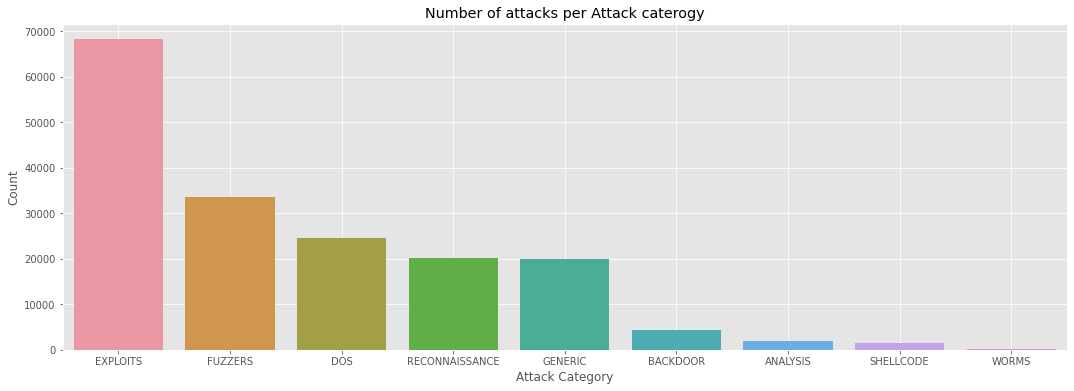

In [119]:
# A seguir mostramos uma grafica de barras:

plt.figure(figsize=(18,6))
sns.barplot(x = newdf['Attack category'].value_counts().index, y=newdf['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')
plt.grid(True)

In [120]:
# A seguir também podemos ver a contagem de cada barra:

pd.DataFrame(newdf['Attack category'].value_counts())[:]

,Attack category
EXPLOITS,68211
FUZZERS,33638
DOS,24582
RECONNAISSANCE,20136
GENERIC,19860
BACKDOOR,4353
ANALYSIS,1881
SHELLCODE,1511
WORMS,169


In [121]:
# Podemos graficar, apenas, os 6 primeiros atributos da coluna "Attack category"

a=pd.DataFrame(newdf['Attack category'].value_counts())[:6]

In [122]:
a

,Attack category
EXPLOITS,68211
FUZZERS,33638
DOS,24582
RECONNAISSANCE,20136
GENERIC,19860
BACKDOOR,4353


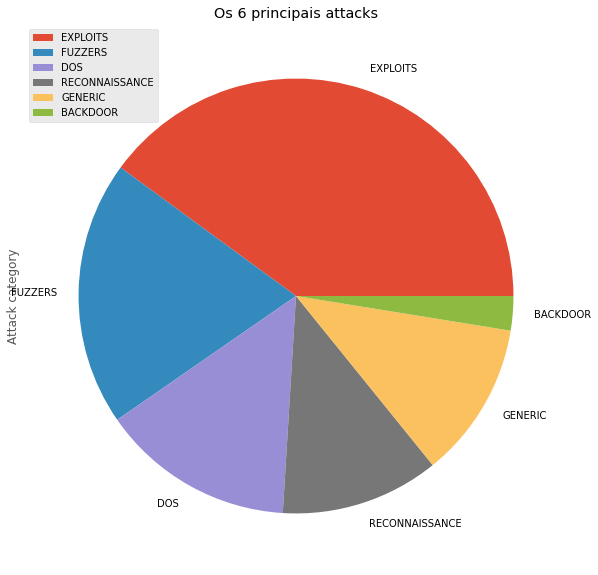

In [123]:
# Vejamos esses atributos num gráfico de pizza:

a.plot(kind='pie', subplots=True, figsize=(10, 10))
plt.title('Os 6 principais attacks')
plt.legend(loc='upper left')
plt.show()

<font color="orange">Agora vamos analisar os Attacks com Date e Time</font>

In [124]:
# Temos:

newdf['Start time']
# Na seguinte celula vamos converter esses Dados na forma padrão

0         1421927414
1         1421927415
2         1421927416
3         1421927417
4         1421927418
             ...    
174336    1424262066
174337    1424262067
174338    1424262067
174339    1424262068
174340    1424262068
Name: Start time, Length: 174341, dtype: object

In [125]:
# Convertendo nossos Dados de Date e Time, assim:

newdf['Start time'] = pd.to_datetime(newdf['Start time'], unit='s')
newdf['Last time'] = pd.to_datetime(newdf['Last time'], unit='s')
newdf['Duration'] = ((newdf['Last time'] - newdf['Start time']).dt.seconds).astype(int)

In [126]:
newdf[:10] # ou também: newdf.head() ou newdf.sample()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Port,Destination Port Service,Duration
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,80.0,HTTP,2
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,NaN,0
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,80.0,HTTP,0
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,5555.0,PERSONAL-AGENT,0
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,80.0,HTTP,0
5,DOS,Miscellaneous,TCP,175.45.176.0,39500,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,http://www.exploit-db.com/exploits/21523/ (htt...,2015-01-22 11:50:19,2015-01-22 11:50:19,80.0,HTTP,0
6,DOS,Miscellaneous,TCP,175.45.176.0,23910,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,http://www.exploit-db.com/exploits/21523/ (htt...,2015-01-22 11:50:19,2015-01-22 11:50:22,80.0,HTTP,3
7,GENERIC,IXIA,TCP,175.45.176.0,29309,149.171.126.14,3000,Alt-N_MDaemon_WorldClient_Service_Memory_Corru...,CVE 2008-2631 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:20,2015-01-22 11:50:20,3000.0,REMOTEWARE-CL,0
8,EXPLOITS,Browser,TCP,175.45.176.0,61089,149.171.126.18,80,Microsoft Internet Explorer Frameset Memory Co...,CVE 2006-3637 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:21,2015-01-22 11:50:21,80.0,HTTP,0
9,EXPLOITS,Browser,TCP,175.45.176.0,4159,149.171.126.18,80,Microsoft Internet Explorer Frameset Memory Co...,CVE 2006-3637 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:21,2015-01-22 11:50:22,80.0,HTTP,1


In [127]:
# Esta parte é importante, porque temos apenas dois dias. Os dias são os seguintes:

newdf['Start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

In [128]:
newdf.describe()

,Source Port,Destination Port,Port,Duration
count,174341.000000,174341.000000,169678.000000,174341.000000
mean,15391.130382,1304.599423,198.166592,2.341572
std,21707.824000,7466.035607,962.671658,9.309381
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,31862.000000,80.000000,80.000000,1.000000
max,65535.000000,65535.000000,43189.000000,60.000000


A média e o percentil de $75\%$ são muito diferentes para a Source Port e a Destination Port, é muito diferente. No entanto, mínimo e máximo são iguais. Aí vem o teste de hipóteses.



>> $H_0$: $μ_1 = μ_2$

>> $H_a$: $μ_1 \neq μ_2$

Podemos obter um de dois resultados do teste:

* Se o valor $p$ for menor que nosso nível de significância ($p < α$), rejeitamos a hipótese nula $H_0$ e afirmamos que a diferença observada é <font color="yellow">estatisticamente significativa</font>.

* Se o valor $p$ for maior que nosso nível de significância ($p > α$), teremos que reter $H_0$ e concluir que a diferença observada não é <font color="yellow">estatisticamente significativa</font>.


O teste de hipótese é conduzido usando uma estatística $T - test$ que especifica as duas Séries <font color="yellow">df_interest['Source Port']</font> e <font color="yellow">df_interest['Destination Port']</font>. Ao especificar essas duas séries, estamos automaticamente nos referindo a um teste comparativo das médias de ambas as séries:

In [129]:

statistic, pvalue = stats.ttest_ind(newdf['Source Port'], newdf['Destination Port'], equal_var=False)


In [130]:
print("p-value in T-test:" + str(pvalue))

p-value in T-test:0.0


Como o valor $p$ é muito próximo de zero, o ``Python`` aproxima essa medida para $0.0$. Com isso em mente, podemos rejeitar a hipótese nula $H_0$ quanto à igualdade das médias das portas de origem e de destino. Isso significa que a porta de origem dos ataques é muito diferente da porta de destino. Desta forma, a maioria dos ataques são direcionados a portas lógicas específicas, o que não deixa um ponto aleatório.


Estaremos usando dois métodos de cálculo de correlação: 

* <font color="orange">Correlação de Pearson:</font> avalia as relações lineares entre duas variáveis. Se o valor for próximo a $0$, há uma relação linear fraca ou inexistente entre as variáveis. [Ver aqui: Pearson](https://psicometriaonline.com.br/o-que-e-correlacao-de-pearson/). 

* <font color="orange">Correlação de Spearman:</font> avalia as relações monotônicas entre duas variáveis. Se o valor for próximo a $0$, há uma relação monotônica fraca ou inexistente entre as variáveis. [Ver aqui Spearman](https://psicometriaonline.com.br/o-que-e-correlacao-de-spearman/).

In [131]:
# Correlação de Pearson:

newdf.corr(method='pearson')

,Source Port,Destination Port,Port,Duration
Source Port,1.000000,0.137155,0.175222,-0.078024
Destination Port,0.137155,1.000000,1.000000,-0.026770
Port,0.175222,1.000000,1.000000,-0.022964
Duration,-0.078024,-0.026770,-0.022964,1.000000


In [132]:
# Correlação de Spearman:

newdf.corr(method='spearman')

,Source Port,Destination Port,Port,Duration
Source Port,1.000000,0.885328,0.895108,0.361013
Destination Port,0.885328,1.000000,1.000000,0.346909
Port,0.895108,1.000000,1.000000,0.348573
Duration,0.361013,0.346909,0.348573,1.000000


In [133]:
df_dummies = pd.get_dummies(newdf, columns=['Attack category'])

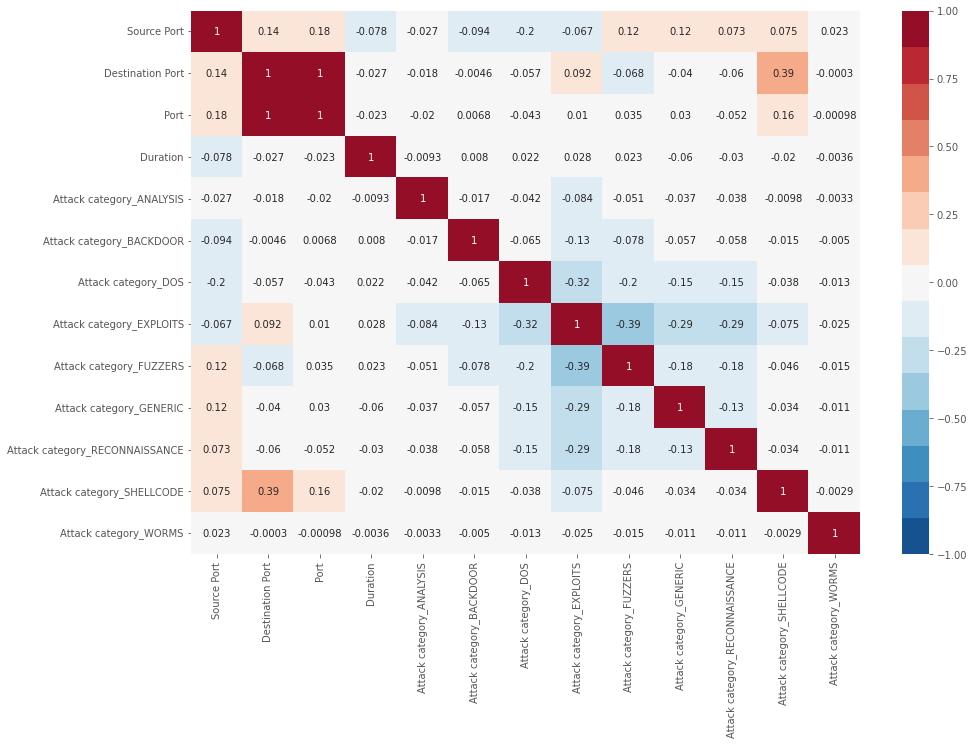

In [134]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummies.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

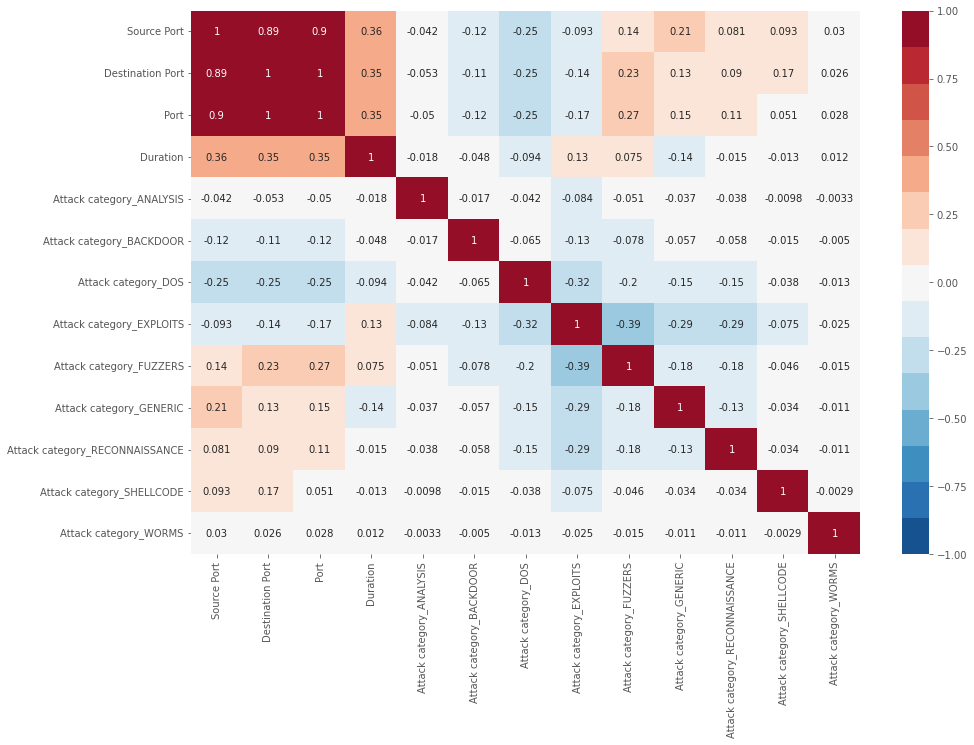

In [135]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummies.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

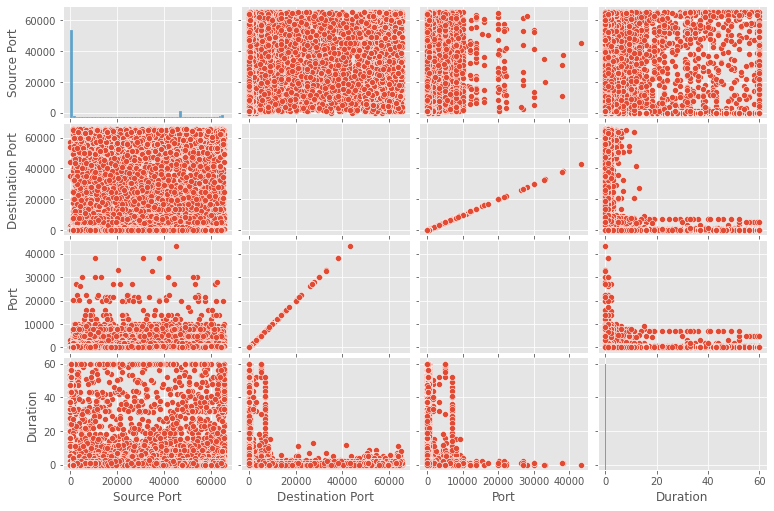

In [136]:
g = sns.pairplot(newdf)
g.fig.set_size_inches(11,7)
plt.show()

In [137]:
newdf['Destination IP'].value_counts()[:10]

149.171.126.17    43199
149.171.126.10    24002
149.171.126.19    21619
149.171.126.13    20464
149.171.126.18    13301
149.171.126.14    12195
149.171.126.12    11970
149.171.126.15    10555
149.171.126.11     9444
149.171.126.16     7592
Name: Destination IP, dtype: int64

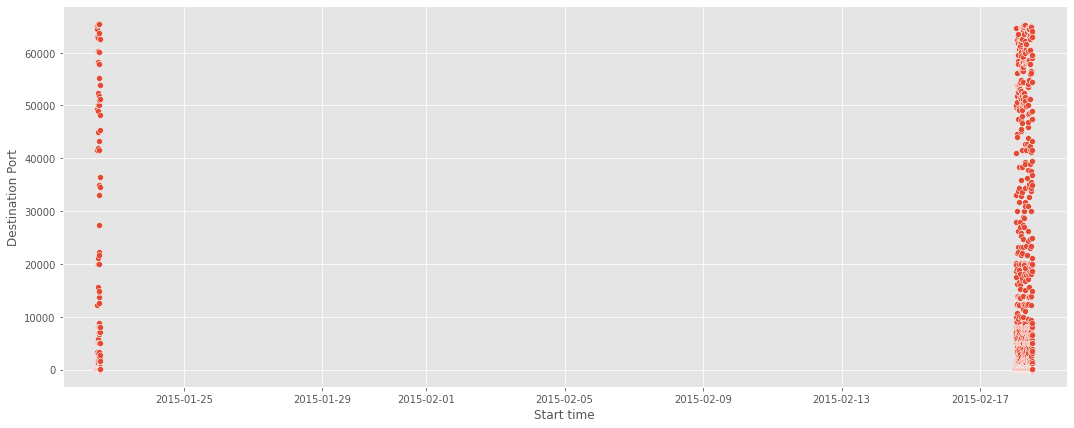

In [138]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start time'].min()-timedelta(days=1),right=newdf['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

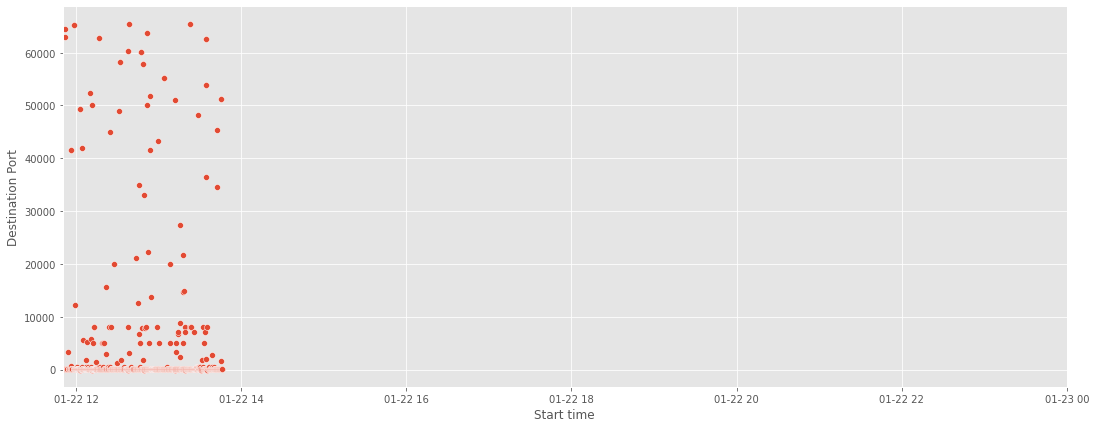

In [139]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))
plt.grid(True)
plt.show()

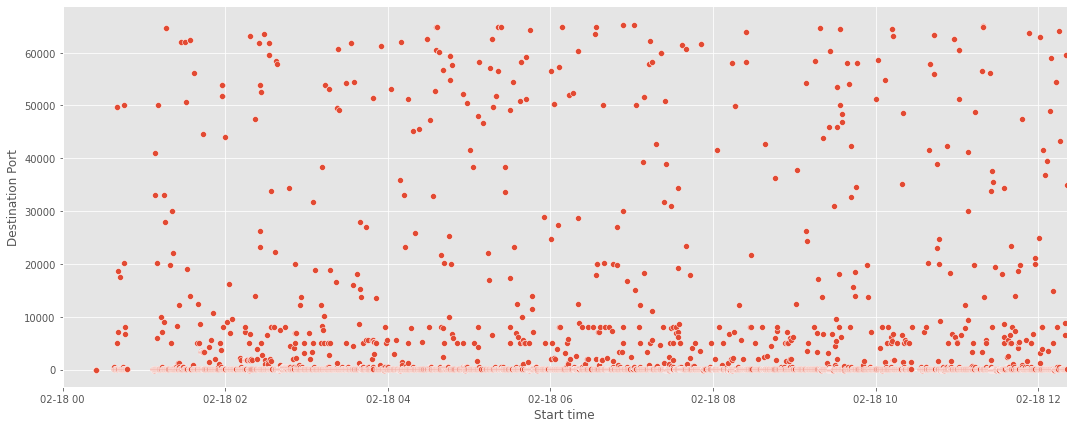

In [140]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=datetime.strptime('15-02-18', '%y-%m-%d'),right=newdf['Start time'].max())
plt.grid(True)
plt.show()

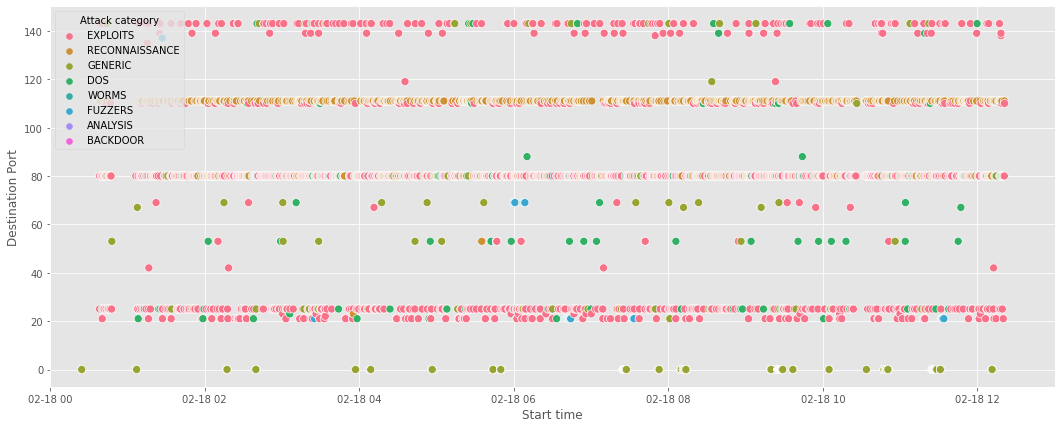

In [141]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', 
                data=newdf[(newdf['Destination IP']=='149.171.126.17')&(newdf['Destination Port']<=150)], 
                s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()

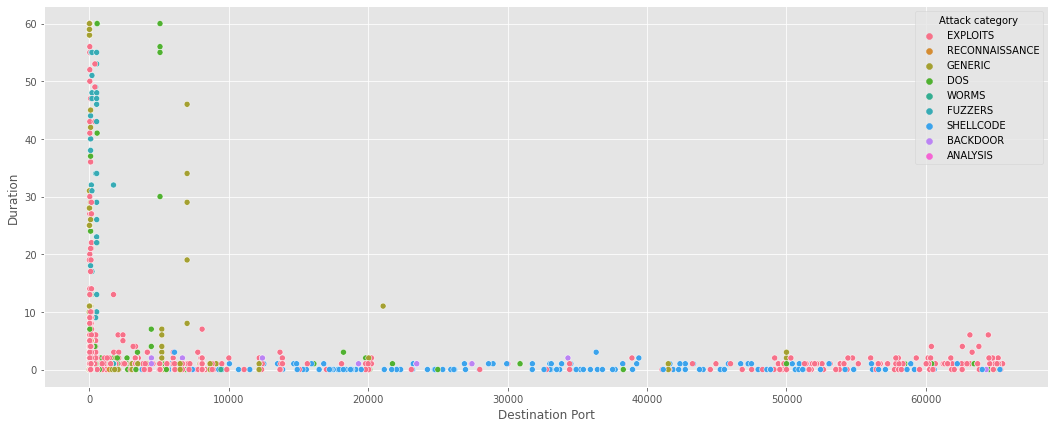

In [142]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='Duration', hue='Attack category', data=newdf[newdf['Destination IP']=='149.171.126.17'])
plt.grid(True)
plt.show()

In [143]:
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(18,8))
    ax = sns.heatmap(df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [144]:
newdf["Start time"][1].hour

11

In [145]:
%%time
df_pivot = newdf.copy()
df_pivot['hour'] = df_pivot.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)

CPU times: user 3.22 s, sys: 12.3 ms, total: 3.24 s
Wall time: 3.23 s


In [146]:
df_pivot[:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Port,Destination Port Service,Duration,hour
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,80.0,HTTP,2,11:00:00
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,NaN,0,11:00:00
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,80.0,HTTP,0,11:00:00
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,5555.0,PERSONAL-AGENT,0,11:00:00
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,80.0,HTTP,0,11:00:00


In [147]:
df_p1 = pd.pivot_table(df_pivot,values='Attack Name', index=['hour'], columns=['Attack category'], aggfunc='count')
df_p1

Attack category,ANALYSIS,BACKDOOR,DOS,EXPLOITS,FUZZERS,GENERIC,RECONNAISSANCE,SHELLCODE,WORMS
hour,,,,,,,,,
00:00:00,3,16,127,543,391,60,177,20,3
01:00:00,186,1148,2640,6716,4477,1748,1804,105,14
02:00:00,71,100,630,2861,1983,1031,1023,113,10
03:00:00,226,60,3755,9759,2743,1513,2727,113,17
04:00:00,64,87,617,2776,2090,1349,1034,115,10
05:00:00,198,645,3038,9368,2536,1834,1750,111,15
06:00:00,84,90,637,2968,2065,994,1010,116,9
07:00:00,179,578,3390,6151,2413,2076,1846,116,15
08:00:00,73,111,664,2938,2048,1081,1010,107,11


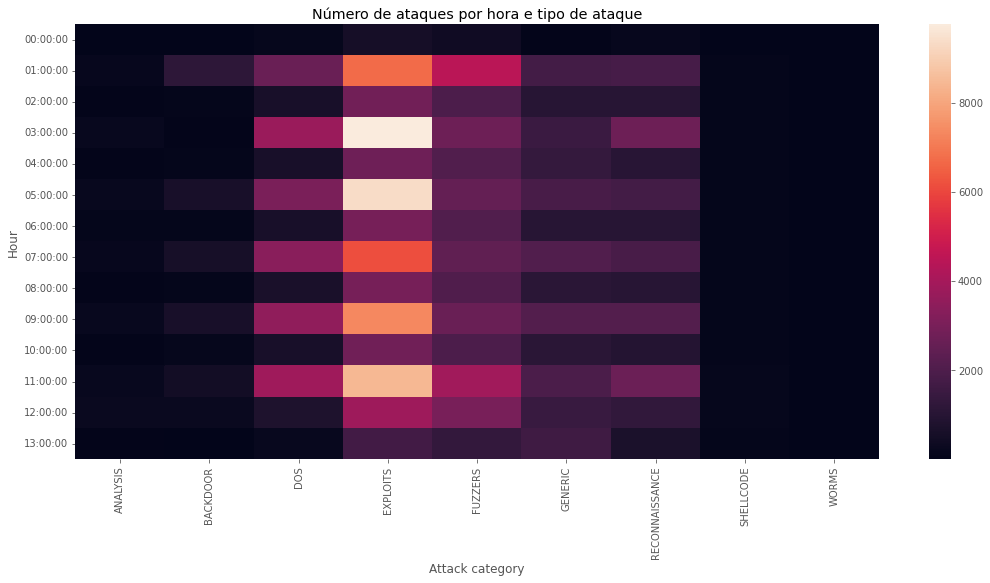

In [153]:
heatmap_graph(df = df_p1, xlabel = 'Attack category', ylabel = 'Hour', title = 'Número de ataques por hora e tipo de ataque')


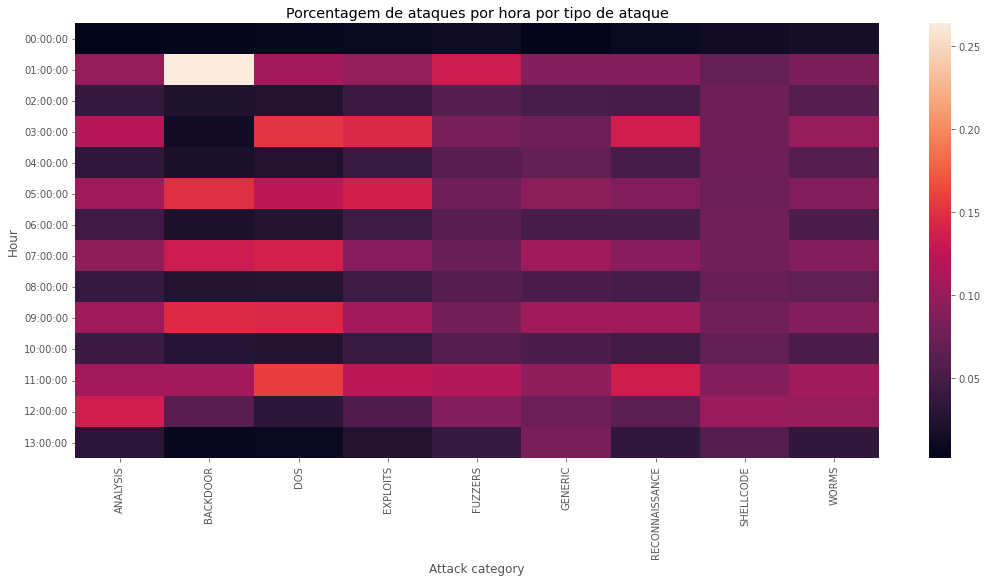

In [154]:
heatmap_graph(df = df_p1/df_p1.sum(), xlabel = 'Attack category', ylabel = 'Hour', title = 'Porcentagem de ataques por hora por tipo de ataque')

<Figure size 1800x576 with 0 Axes>

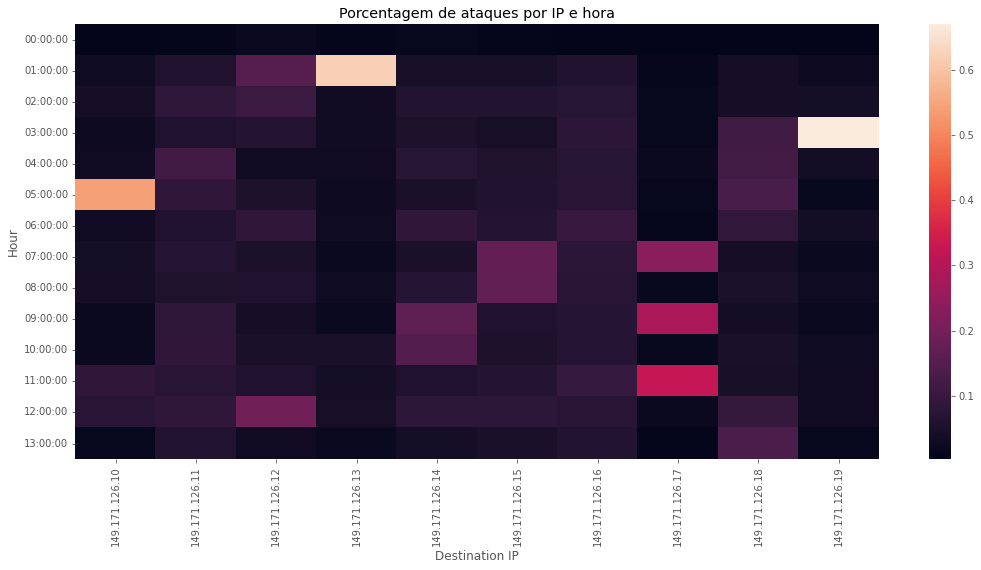

In [166]:
plt.figure(figsize=(25, 8))
df_p2 = pd.pivot_table(df_pivot, values='Attack Name', index=['hour'], columns=['Destination IP'], aggfunc='count')
heatmap_graph(df = df_p2/df_p2.sum(), xlabel = 'Destination IP', ylabel = 'Hour', title = 'Porcentagem de ataques por IP e hora')


Embora existam mais de $170000$ registros relacionados a ataques de ``cibersegurança``, esses ataques visam $10$ servidores com <font color="orange">endereços IPv4</font> no intervalo $[149.171.126.10,149.171.126.19]$. Isso significa que a empresa foi atacada em várias ocasiões durante o período observado, em uma sub-rede específica, o que denota uma sucessão não acidental e direcionada de eventos.

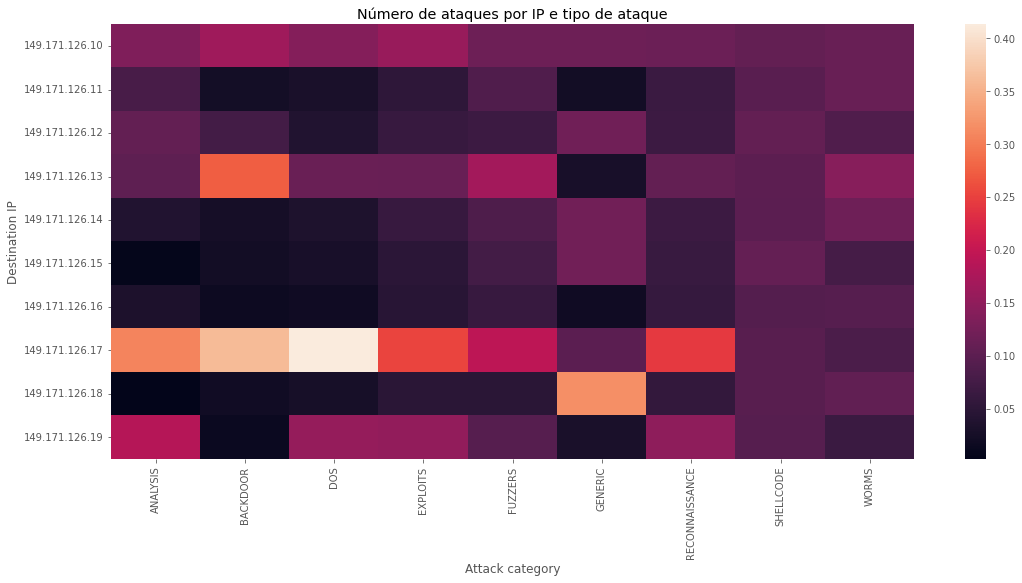

In [167]:
df_p3 = pd.pivot_table(df_pivot, values='Attack Name', index=['Destination IP'], columns=['Attack category'], aggfunc='count')
heatmap_graph(df = df_p3/df_p3.sum(), xlabel = 'Attack category', ylabel = 'Destination IP', title = 'Número de ataques por IP e tipo de ataque')

A máquina mais atacada é aquela com o endereço <font color="yellow">IPv4 149.171.126.17</font>. Por outro lado, enquanto ``WORMS``, ``SHELLCODE`` e ataques ``GENERIC`` não são direcionados a máquinas específicas, Negação de Serviços (Denial of Services), ``EXPLOITS`` e ``BACKDOOR`` são claramente direcionados a servidores específicos.


\\
Vamos agora olhar para esta mesma relação por categoria de ataque (Attack Category) realizando um ``T-test`` de pares:

In [168]:
for attack in list(newdf['Attack category'].unique()):
    df_attack = newdf[newdf['Attack category'] == attack].copy()
    statistic, pvalue = stats.ttest_ind(df_attack['Source Port'], df_attack['Destination Port'], equal_var=False)
    print('p-value in T-test for ' + attack + ' attack: ' + str(pvalue))


p-value in T-test for RECONNAISSANCE attack: 0.0
p-value in T-test for EXPLOITS attack: 0.0
p-value in T-test for DOS attack: 0.0
p-value in T-test for GENERIC attack: 0.0
p-value in T-test for SHELLCODE attack: 0.3205085348227197
p-value in T-test for FUZZERS attack: 0.0
p-value in T-test for WORMS attack: 4.246722648635902e-46
p-value in T-test for BACKDOOR attack: 4.8983630604388355e-17
p-value in T-test for ANALYSIS attack: 9.319524862935004e-87


Como pode ser visto, os ``𝑝-values`` de todas as categorias de ataque, exceto uma, são muito próximos de $0.0$. Isso significa que os ataques foram direcionados às portas específicas, exceto os ataques ``SHELLCODE``, cuja hipótese nula não pode ser rejeitada. Para este tipo de ataque existe uma aleatoriedade definida, o que significa que as portas de origem e destino possuem médias semelhantes.

\\
Para verificar esta afirmação, faremos uso de uma tabela de contingência que permite relacionar a contagem de um determinado par de variáveis, semelhante a como vimos o ``.pivot_table()``

In [169]:
df_crosstab = pd.crosstab(newdf['Attack category'], newdf['Destination Port'])
df_crosstab

Destination Port,0,10,21,22,23,25,31,42,53,67,68,69,80,81,88,89,105,110,111,119,123,135,137,138,139,143,161,162,179,383,389,443,445,446,464,465,497,500,502,513,...,65189,65198,65218,65219,65231,65239,65245,65248,65262,65264,65267,65284,65286,65287,65300,65306,65311,65331,65334,65359,65361,65365,65390,65398,65400,65414,65418,65419,65420,65446,65455,65460,65470,65479,65486,65497,65502,65511,65517,65535
Attack category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANALYSIS,1442,0,0,0,0,6,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BACKDOOR,4000,0,7,0,0,0,7,0,0,0,0,0,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DOS,20825,4,75,0,13,425,0,0,154,33,0,27,1756,0,38,0,0,90,7,0,18,7,0,7,48,103,14,20,0,0,40,21,91,0,7,3,0,14,20,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EXPLOITS,40143,0,2198,14,135,4412,0,21,209,98,0,74,11638,7,0,7,0,1558,89,21,0,21,11,14,254,1547,7,0,2,14,75,72,171,7,0,0,0,0,0,53,...,2,2,2,2,2,0,2,2,0,2,0,1,2,2,2,2,2,2,0,2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,4,2,2,2,0
FUZZERS,13355,0,758,0,0,0,0,0,0,0,0,190,1386,0,0,0,0,0,0,0,0,583,519,0,0,0,0,0,5464,0,0,0,4659,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GENERIC,2612,0,26,6,0,427,0,0,13438,54,1,144,1672,0,0,0,7,34,12,7,0,0,0,0,0,170,0,7,0,0,28,32,33,0,0,0,13,37,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
RECONNAISSANCE,8324,0,0,0,7,7,0,0,41,0,0,0,2157,0,0,0,0,0,9507,0,0,0,6,0,0,0,81,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SHELLCODE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
WORMS,0,0,0,0,0,0,0,0,0,0,0,7,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
